### Зазгрузка и обработка датасета

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('C:/users/r0ndo/Churn Prediction Project/')

In [2]:
# Загрузка данных с признаками
data = pd.read_csv('orange_small_churn_data.txt')
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


Первые 190 признаков - числовые, остальные - категориальные

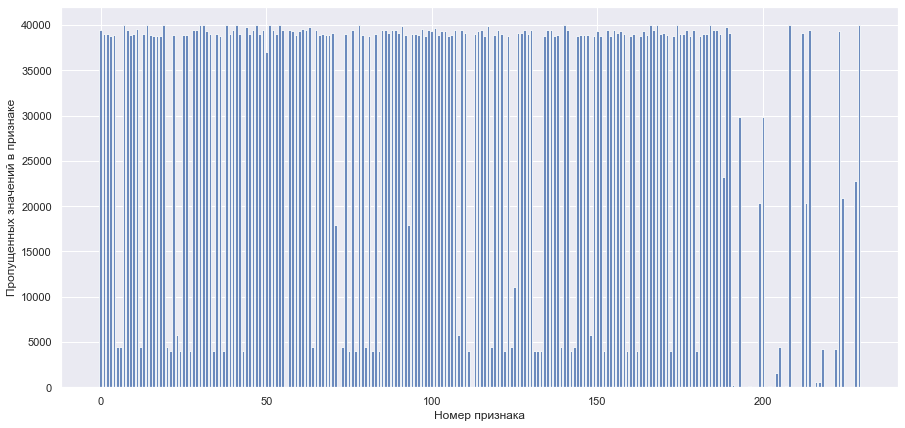

In [3]:
# Визуализация количества пропущенных значений
sns.set()
plt.figure(figsize = (15, 7))
plt.bar(range(data.shape[1]), data.apply(lambda x: x.isnull().sum()), alpha = 0.8)
plt.xlabel('Номер признака')
plt.ylabel('Пропущенных значений в признаке')
plt.show()

In [4]:
# Функция проверяет, все ли значения признака пропущены
def all_nan(column):
    if column.isnull().sum() == len(column):
        return 1 # все значения пропущены
    else:
        return 0 # остальные случаи

In [5]:
# Оставляем колонки, где есть хотя бы одно непропущенное значение
nan_columns = data.apply(all_nan, axis = 0)
data = data.drop(nan_columns[nan_columns == 1].index, axis = 1)
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,hLKtJ9p,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,hN8KpA1,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,4UxGlow,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,ylCK5YS,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,PYpzAu9,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN


In [6]:
# Загрузка и обработка меток классов: 1 - отток, 0 - не отток
labels = pd.read_csv('orange_small_churn_labels.txt', header = None)
labels.columns = ['Label']
labels['Label'] = labels['Label'].map(lambda x: 0 if x == -1 else 1)
labels = labels['Label']
labels.head()

0    0
1    0
2    0
3    1
4    0
Name: Label, dtype: int64

In [7]:
# Баланс классов
churn_share = len(data[(labels == 1).values]) / len(data)
non_churn_share = 1 - churn_share
print('Доля класса "отток":', np.round(churn_share, 3))
print('Доля класса "не отток":', np.round(non_churn_share, 3))

Доля класса "отток": 0.074
Доля класса "не отток": 0.926


### Выбор метрики качества

Т.к. классы не сбалансированы, использовать метрику accuracy бесполезно. Precision, recall и f1-score тоже не подходят, т.к. зависят от выбранного порога, который, в свою очередь, сильно влияет на экономический эффект. Поэтому нужно использовать метрики, не зависящие от порога, например, AUC-ROC. Однако AUC-ROC будет слабо реагировать на изменение False Positive за счет преобладания класса "не отток". Поэтому в данном случае в качестве ключевой метрики для подбора параметров алгоритма берется AUC-PR.

Для построения экономической модели вводятся следующие параметры:
1. Сколько денег приносит один пользователь в месяц (value);
2. Сколько стоит удержание одного пользователя (expense);
3. Вероятность принятия пользователем нашего предложения (prob);
4. Доля пользователей, ранжированных по вероятности, которые примут участие в кампании (share).

Экономический эффект рассчитывается из матрицы ошибок по формуле: ___TP\*(value\*prob - expense) - FP\*expense___

Т.е. мы остаемся в плюсе, когда прогноз алгоритма совпадает с реальностью, и в минусе, когда наш алгоритм ошибается и предлагает потратить средства на пользователя, не склонного к оттоку.

In [178]:
# Зададим некоторые значения value и expense
expense = 50
value = 300

In [41]:
# Импортимруем матрицу ошибок
from sklearn.metrics import confusion_matrix

In [62]:
# Функция для вычисления экономического эффекта
def economic_effect(y_true, y_prob, expense, value, prob = 0.8, share = 0.5, thr = 0.5):
    # Массив, позволяющий отсортировать n% людей с наибольшей вероятностью оттока
    temp_df = pd.DataFrame({'y_prob': y_prob, 'y_test': y_true}).sort_values('y_prob')
    sorted_df = temp_df[int(len(y_true)*(1-share)):]
    
    # Возвращение к фактическим и предсказанным значениям
    y_pred = sorted_df['y_prob'].values
    y_true = sorted_df['y_test'].values
    
    # Вычисление экономического эффекта через матрицу ошибок
    conf_matrix = confusion_matrix(y_true, y_pred >= thr, labels = [1, 0])
    tp, fp = conf_matrix[0, 0], conf_matrix[0, 1]
    return tp*(value*prob - expense) - fp*expense

### Бейзлайн

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import precision_recall_curve, auc, make_scorer

In [12]:
# Делим датасет на 2 части
X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify = labels, 
                                                    test_size = 0.3, random_state = 42)

In [13]:
# Простые импьютеры пропущенных значений, стандартизация числовых переменных
# и бинарное кодирование категориальных переменных + логит-регрессия с балансом классов
num_imputer = SimpleImputer(strategy = 'mean')
cat_imputer = SimpleImputer(strategy = 'most_frequent')
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown = 'ignore')
logreg = LogisticRegression(max_iter = 2000, class_weight = 'balanced', n_jobs = -1)

# Названия числовых и категориальных признаков
num_features = data.select_dtypes(include = ['float64', 'int64']).columns
cat_features = data.select_dtypes(include = 'object').columns

# Обработка числовых признаков
num_trans = ColumnTransformer([('num_imputer', num_imputer, num_features)])
num_pipe = Pipeline([('num_trans', num_trans), ('scaler', scaler)])

# Обработка категориальных признаков
cat_trans = ColumnTransformer([('cat_imputer', cat_imputer, cat_features)])
cat_pipe = Pipeline([('cat_trans', cat_trans), ('encoding', encoder)])

# Объединение трансформеров для разных типов переменных
feature_union = FeatureUnion([('num', num_pipe), ('cat', cat_pipe)], n_jobs = -1)

# Общий пайплайн
logreg_pipe = Pipeline([('transformer', feature_union), ('clf', logreg)])

In [14]:
# Функция для оценки PR-AUC
def score_func(y, y_pred):
    precision, recall, _ = precision_recall_curve(y, y_pred)
    return auc(recall, precision)

custom_scorer = make_scorer(score_func, needs_threshold = True)

In [16]:
# Кросс-валидация
pr_auc_score = cross_val_score(logreg_pipe, X_train, y_train, 
                               n_jobs = -1, scoring = custom_scorer)

In [17]:
print('Mean pr-auc:', np.round(pr_auc_score.mean(), 4))
print('PR-auc std: ', np.round(pr_auc_score.std(), 4))

Mean pr-auc: 0.1171
PR-auc std:  0.0075


In [15]:
# Обучение на всей выборке для проверки на валидационном датасете
baseline_model = logreg_pipe.fit(X_train, y_train)
preds_logreg = list(zip(*baseline_model.predict_proba(X_test)))[1]

In [16]:
print('PR-auc on test set: ', np.round(score_func(y_test, preds_logreg), 4))

PR-auc on test set:  0.1253


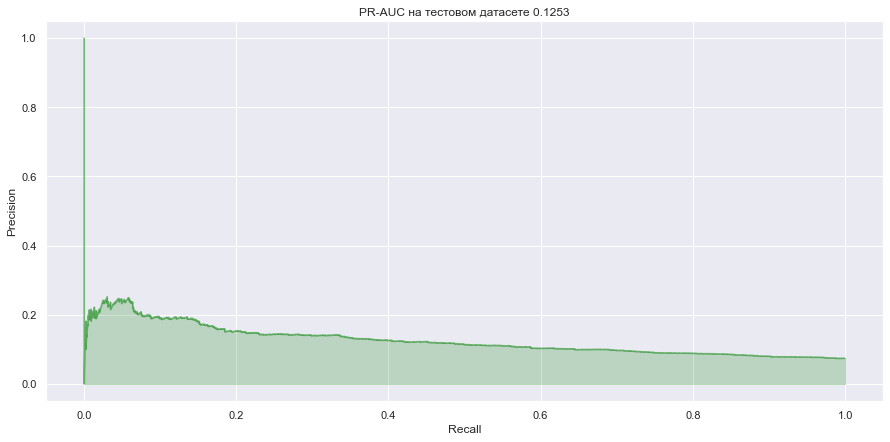

In [17]:
# Визуализация PR-AUC
plt.figure(figsize = (15, 7))
precision, recall, _ = precision_recall_curve(y_test, preds_logreg)
plt.fill_between(recall, precision, color = 'green', alpha = 0.2)
plt.plot(recall, precision, color = 'green', alpha = 0.5)
plt.title('PR-AUC на тестовом датасете {}'.format(np.round(score_func(y_test, preds_logreg), 4)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [179]:
print('Экономический эффект от проведения маркетинговой кампании:', 
      economic_effect(y_test, preds_logreg, expense, value))

Экономический эффект от проведения маркетинговой кампании: 22220.0


In [180]:
print('Доля от максимально возможного эффекта для тестовой выборки:',
      np.round(economic_effect(y_test, preds_logreg, expense, value) / np.sum(np.where(y_test == 1, (value - expense)*0.8, 0)), 4))

Доля от максимально возможного эффекта для тестовой выборки: 0.1244


Результаты очень слабые, необходим более продвинутый алгоритм

### CatBoost

In [182]:
from catboost import CatBoostClassifier, cv, Pool
from IPython.display import Image # для отображения результатов обучения catboost

In [31]:
# Кастомная метрика PR-AUC для catboost
class PR_auc_score:
    def is_max_optimal(self):
        return True
    
    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])
        
        approx = approxes[0]
        y_pred = np.array([approx[i] for i in range(len(approx))])
        y_true = np.array(target)
        
        return score_func(y_true, y_pred), 0
        
    def get_final_error(self, error, weight):
        return error

In [32]:
# Преобразование данных в формат Pool
num_trans = ColumnTransformer([('num_imputer', num_imputer, num_features)], 
                               remainder = 'passthrough')
cat_index = [data.columns.get_loc(i) for i in cat_features]

# Пропущенные значения категориальных переменных заменяются на отдельную категорию
# Из-за трудностей построения пайплайна пропущенные значения числовых признаков 
# сразу заменяются на среднее
train_pool = Pool(data = num_trans.fit_transform(X_train.fillna('nan')), 
                  label = y_train, cat_features = cat_index)

In [ ]:
# Кросс-валидация с параметрами по умолчанию
params = {'loss_function': 'Logloss', 'eval_metric': PR_auc_score(),
          'auto_class_weights': 'Balanced'}
cv_results = cv(pool = train_pool, params = params, fold_count = 3, 
                stratified = True, verbose = False, plot = True, shuffle = True)

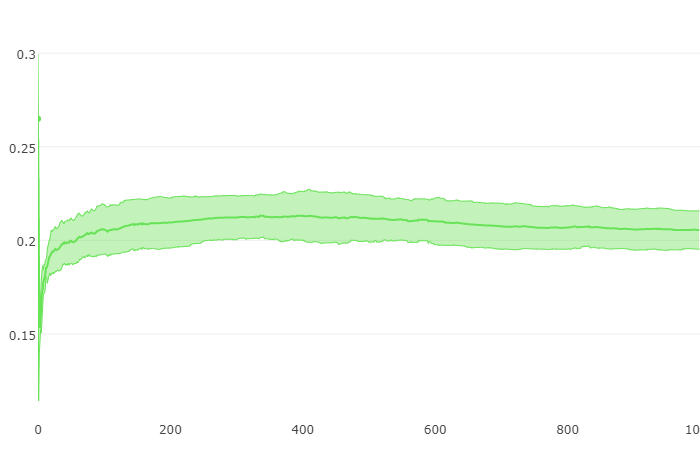

In [192]:
# CV с параметрами по умолчанию
Image("CV с дефолтными параметрами.png", width = 400, height = 150)

In [156]:
# Сетка с параметрами для жадного поиска
from sklearn.model_selection import ParameterGrid

In [ ]:
# Кросс-валидация с разными параметрами регуляризации (l2_leaf_reg)
# Остальные параметры настроены так, чтобы ускорить вычисления
param_grid = ParameterGrid({'loss_function': ['Logloss'], 'auto_class_weights': ['Balanced'],
                            'iterations': [1000], 'learning_rate': [0.013], 'max_ctr_complexity': [3],
                            'early_stopping_rounds': [70], 'eval_metric':[ PR_auc_score()],
                            'boosting_type': ['Plain'], 'subsample': [0.7], 'rsm': [0.5], 
                            'one_hot_max_size': [20], 'bootstrap_type': ['Bernoulli'],
                            'l2_leaf_reg': [3, 4, 5]})

for params in param_grid:
    cv_results = cv(params = params,pool = train_pool, 
                    fold_count = 3, shuffle = True,
                    stratified = True, plot = True, verbose = False)

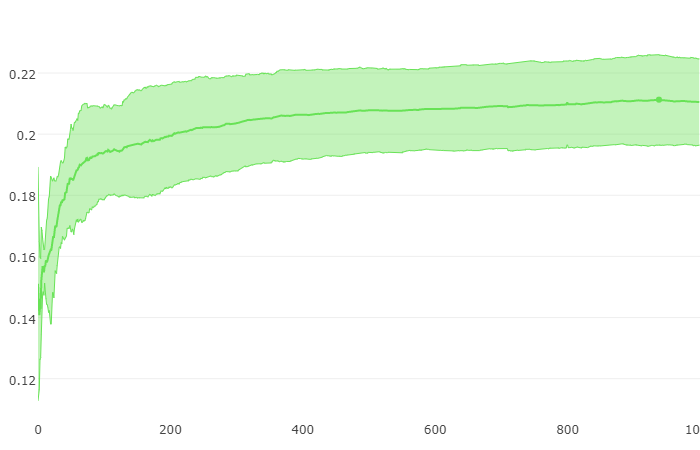

In [189]:
# CV с l2_leaf_reg = 3
Image('CV с l2_leaf_reg_3.png', width = 400, height = 150)

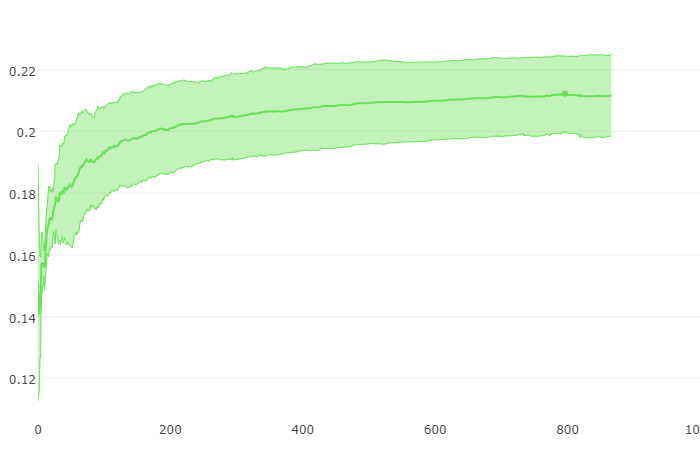

In [190]:
# CV с l2_leaf_reg = 4
Image('CV с l2_leaf_reg_4.png', width = 400, height = 150)

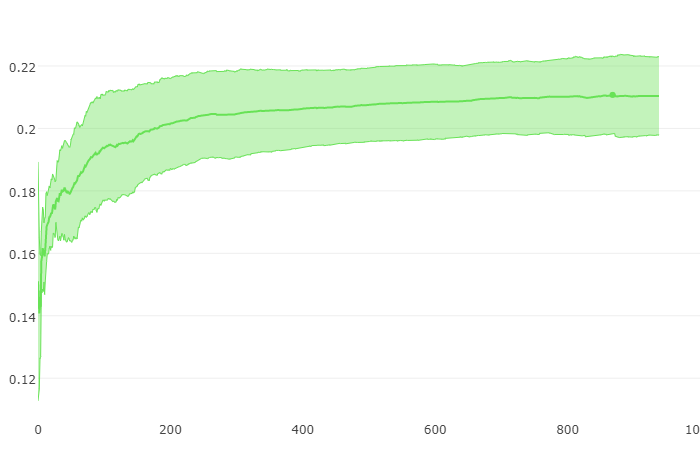

In [191]:
# CV с l2_leaf_reg = 5
Image('CV с l2_leaf_reg_5.png', width = 400, height = 150)

In [33]:
# Оставляем дефолтную регуляризацию
# Обучение на всей тренировочной выборке и проверка на валидационном сете
test_pool = Pool(data = num_trans.transform(X_test.fillna('nan')), 
                 label = y_test, cat_features = cat_index)
catboost = CatBoostClassifier(loss_function = 'Logloss', iterations = 950,
                              learning_rate = 0.013, auto_class_weights = 'Balanced', 
                              max_ctr_complexity = 3, boosting_type = 'Plain',
                              subsample = 0.7, rsm = 0.5, one_hot_max_size = 20,
                              bootstrap_type = 'Bernoulli', l2_leaf_reg = 3, 
                              eval_metric = PR_auc_score())
catboost.fit(train_pool, verbose = 100, eval_set = test_pool)

0:	learn: 0.1328813	test: 0.0738498	best: 0.0738498 (0)	total: 336ms	remaining: 5m 18s
100:	learn: 0.2162769	test: 0.1917001	best: 0.1920485 (98)	total: 15.1s	remaining: 2m 6s
200:	learn: 0.2294095	test: 0.1959598	best: 0.1961537 (195)	total: 31.8s	remaining: 1m 58s
300:	learn: 0.2380427	test: 0.1982312	best: 0.1982312 (300)	total: 46.7s	remaining: 1m 40s
400:	learn: 0.2446520	test: 0.1984911	best: 0.1984911 (400)	total: 1m 3s	remaining: 1m 26s
500:	learn: 0.2507796	test: 0.2003480	best: 0.2005288 (495)	total: 1m 22s	remaining: 1m 14s
600:	learn: 0.2560287	test: 0.2008883	best: 0.2010878 (570)	total: 1m 38s	remaining: 57.4s
700:	learn: 0.2614339	test: 0.2019411	best: 0.2019448 (694)	total: 1m 53s	remaining: 40.4s
800:	learn: 0.2688933	test: 0.2027238	best: 0.2027964 (778)	total: 2m 9s	remaining: 24.1s
900:	learn: 0.2829711	test: 0.2025631	best: 0.2030243 (838)	total: 2m 25s	remaining: 7.89s
949:	learn: 0.2911505	test: 0.2026861	best: 0.2030243 (838)	total: 2m 32s	remaining: 0us

bestTe

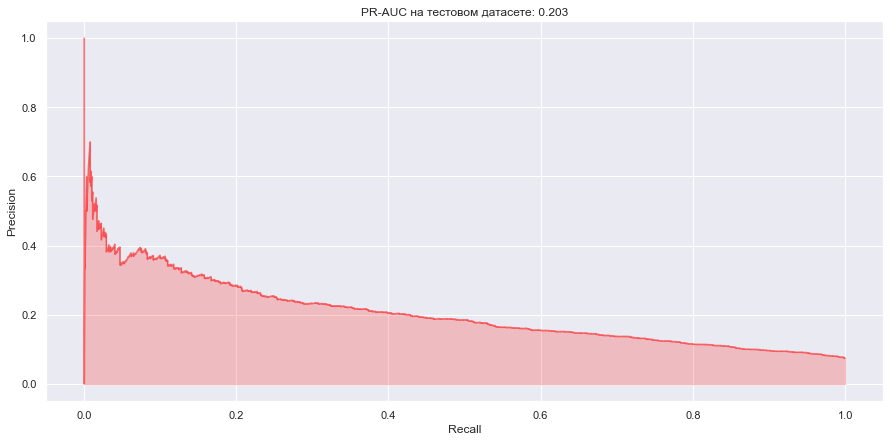

In [37]:
# Визуализация PR-AUC на тестовом сете
plt.figure(figsize = (15, 7))
preds_catboost = list(zip(*catboost.predict_proba(test_pool)))[1]
precision, recall, _ = precision_recall_curve(y_test, preds_catboost)
plt.fill_between(recall, precision, color = 'red', alpha = 0.2)
plt.plot(recall, precision, color = 'red', alpha = 0.5)
plt.title('PR-AUC на тестовом датасете: {}'.format(np.round(score_func(y_test, preds_catboost), 4)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [193]:
print('Экономический эффект от проведения маркетинговой кампании:', 
      economic_effect(y_test, preds_catboost, expense, value))

Экономический эффект от проведения маркетинговой кампании: 107070.0


In [194]:
print('Доля от максимально возможного эффекта для тестовой выборки:',
      np.round(economic_effect(y_test, preds_catboost, expense, value) / np.sum(np.where(y_test == 1, (value - expense)*0.8, 0)), 4))

Доля от максимально возможного эффекта для тестовой выборки: 0.5995


Результаты гораздо лучше. Однако вероятность принятия пользователем нашего предложения слишком оптимистичная, а затраты и доходы могут варьировать.

### Влияние параметров на экономический результат

Посмотрим на экономический результат при разных значениях параметров, участвующих в расчетах. Касательно модели выберем оптимальные порог разделения классов и долю пользователей, принимающих участие в маркетинговой кампании.

In [78]:
from sklearn.model_selection import StratifiedKFold

In [117]:
# Разобьем весь датасет на 5 фолдов
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
catboost = CatBoostClassifier(loss_function = 'Logloss', iterations = 950,
                              learning_rate = 0.013, auto_class_weights = 'Balanced', 
                              max_ctr_complexity = 3, boosting_type = 'Plain',
                              subsample = 0.7, rsm = 0.5, one_hot_max_size = 20,
                              bootstrap_type = 'Bernoulli', l2_leaf_reg = 3, 
                              eval_metric = PR_auc_score())

results = []
split = 0
for train_index, test_index in skf.split(data, labels):
    # Обучение классификатора на тренировочных фолдах
    train_pool_2 = Pool(data = num_trans.fit_transform(data.iloc[train_index, :].fillna('nan')), 
                        label = labels[train_index], cat_features = cat_index)
    test_pool_2 =  Pool(data = num_trans.transform(data.iloc[test_index, :].fillna('nan')),
                        cat_features = cat_index)
    catboost.fit(train_pool_2, verbose = 500)
    preds = list(zip(*catboost.predict_proba(test_pool_2)))[1]
    
    # Оценка экономического эффекта при разных значения параметров на тестовом фолде
    for share in np.arange(0.1, 1, 0.2):
        for thr in np.arange(0.1, 1, 0.2):
            for prob in [0.05, 0.1, 0.3]:
                for expense in [20, 50, 70]:
                    for value in [100, 200, 300]:
                        effect = economic_effect(labels[test_index], preds, 
                                                 expense, value, prob, share, thr)
                        of_max = effect / np.sum(np.where(labels[test_index] == 1, 
                                                          (value - expense)*prob, 0))
                        results.append([split, share, thr, prob, expense, value, effect, of_max])
    split +=1

0:	learn: 0.1715341	total: 165ms	remaining: 2m 36s
500:	learn: 0.2496486	total: 1m 21s	remaining: 1m 12s
949:	learn: 0.2863304	total: 2m 45s	remaining: 0us
0:	learn: 0.1751839	total: 170ms	remaining: 2m 40s
500:	learn: 0.2445368	total: 1m 32s	remaining: 1m 23s
949:	learn: 0.2767873	total: 3m 7s	remaining: 0us
0:	learn: 0.1651811	total: 161ms	remaining: 2m 32s
500:	learn: 0.2382276	total: 1m 39s	remaining: 1m 28s
949:	learn: 0.2706875	total: 3m 16s	remaining: 0us
0:	learn: 0.1253639	total: 181ms	remaining: 2m 52s
500:	learn: 0.2412899	total: 1m 32s	remaining: 1m 22s
949:	learn: 0.2753426	total: 3m 1s	remaining: 0us
0:	learn: 0.1601838	total: 190ms	remaining: 3m
500:	learn: 0.2374516	total: 1m 32s	remaining: 1m 22s
949:	learn: 0.2688747	total: 3m 6s	remaining: 0us


In [167]:
# Выводим результаты в виде датафрейма
# effect - совокупный экономический эффект за все сплиты
# of_max - доля экономического результата от максимально возможного (если бы не было ошибок)
results_df = pd.DataFrame(results, columns = ['split', 'share', 'thr', 'prob', 'expense', 
                                              'value', 'effect', 'of_max']).groupby(['share', 'thr', 'prob', 'expense', 'value'], as_index = False)[['effect', 'of_max']]\
                                                                           .agg({'effect': np.sum, 'of_max': np.mean})\
                                                                           .sort_values('effect')
results_df.tail()

,share,thr,prob,expense,value,effect,of_max
317,0.5,0.3,0.3,20,300,168420.0,0.673718
587,0.9,0.3,0.3,20,300,185600.0,0.742447
425,0.7,0.1,0.3,20,300,189980.0,0.759968
452,0.7,0.3,0.3,20,300,189980.0,0.759968
560,0.9,0.1,0.3,20,300,205940.0,0.823811


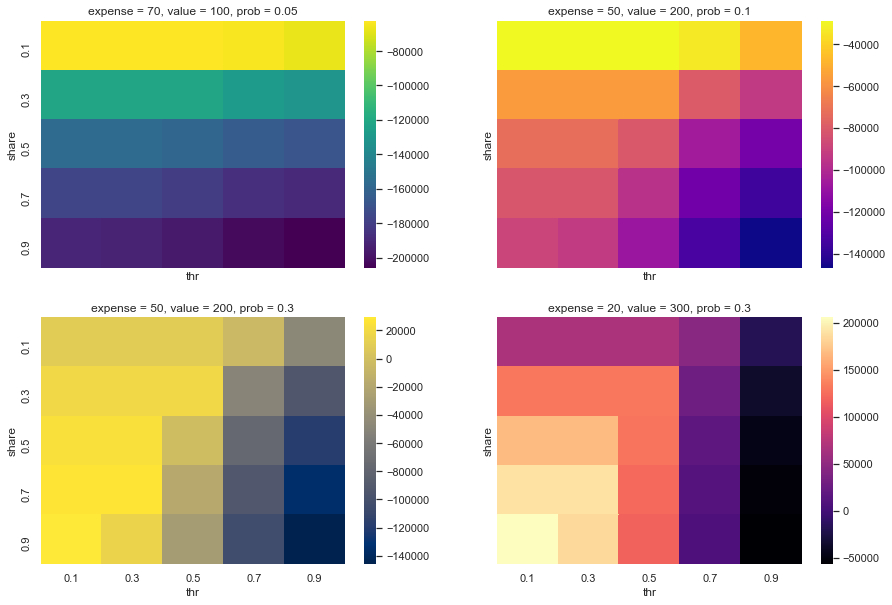

In [148]:
# Тепловые карты для 4 сценариев (параметры указаны в названиях)
sns.set()
fig, ax = plt.subplots(2, 2, figsize = (15, 10), sharex = True, sharey = True)

plt.subplot(ax[0, 0])
sns.heatmap(np.round(results_df[(results_df['expense'] == 70) &\
           (results_df['value'] == 100) &\
           (results_df['prob'] == 0.05)], 1).pivot('share', 'thr', 'effect'), cmap = 'viridis')
plt.title('expense = 70, value = 100, prob = 0.05')

plt.subplot(ax[0, 1])
sns.heatmap(np.round(results_df[(results_df['expense'] == 50) &\
           (results_df['value'] == 200) &\
           (results_df['prob'] == 0.1)], 1).pivot('share', 'thr', 'effect'), cmap = 'plasma')
plt.title('expense = 50, value = 200, prob = 0.1')

plt.subplot(ax[1, 0])
sns.heatmap(np.round(results_df[(results_df['expense'] == 50) &\
           (results_df['value'] == 200) &\
           (results_df['prob'] == 0.3)], 1).pivot('share', 'thr', 'effect'), cmap = 'cividis')
plt.title('expense = 50, value = 200, prob = 0.3')

plt.subplot(ax[1, 1])
sns.heatmap(np.round(results_df[(results_df['expense'] == 20) &\
           (results_df['value'] == 300) &\
           (results_df['prob'] == 0.3)], 1).pivot('share', 'thr', 'effect'), cmap = 'magma')
plt.title('expense = 20, value = 300, prob = 0.3')
plt.show()

Наилучшими порогом и долей участвующих пользователей являются малые значения - менее 10%. Теперь посмотрим на влияние факторов с помощью простой линейной регрессии.

In [172]:
import statsmodels.api as sm

# Исследуем влияние факторов на экономический эффект
X = sm.add_constant(results_df.drop(['effect', 'of_max'], axis = 1))
y = results_df['effect']
ols = sm.OLS(y, X)
res = ols.fit(cov_type = 'HC1')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 effect   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     418.1
Date:                Fri, 19 Mar 2021   Prob (F-statistic):          4.33e-203
Time:                        17:41:26   Log-Likelihood:                -8009.4
No. Observations:                 675   AIC:                         1.603e+04
Df Residuals:                     669   BIC:                         1.606e+04
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.121e+04   6509.802      6.330      0.0

Наибольшее влияние на нашу модель оказывают вероятность, доля пользователей, порог отсечения. При этом доля пользователей и порог отсечения могут быть выбраны с помощью текущей модели, а вероятность принятия нашего предложения зависит от успеха маркетинговых мероприятий. Поэтому дополнительные средства лучше вложить в маркетинг, чем в модель (увеличение и улучшение качества данных, построение более сложных моделей).

Более сильное влияние расходов на удержание по сравнению с приносимым доходом объясняется наличием False Positive, при которых мы только теряем деньги. Таким образом, важнее оптимизировать расходы на удержание, чем пытаться увеличить доход от удержанных пользователей.